# Explore here

In [1]:
# Your code here

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

dataset = '../data/raw/AB_NYC_2019.csv'

# Importo el dataset
df = pd.read_csv(dataset)

# Voy a investigar los tipos de datos, valores nulos y distribuciones.

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [2]:
# Ver la distribución de los datos
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# Estadísticas descriptivas
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [4]:
# Ver cuántos valores nulos existen

df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
# 'id' y 'host_name' no considero que los vaya a ocupar para el modelado.
# 'last_review' parece no ser útil, pero 'reviews_per_month' sí.
# Rellenaré 'reviews_per_month' con 0 y eliminaré 'last_review', 'id', 'host_name'.

df = df.dropna(subset=['name'])
df['reviews_per_month'].fillna(0, inplace=True)
df.drop(['id', 'host_name', 'last_review'], axis=1, inplace=True)

/tmp/ipykernel_4711/223122375.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)
/tmp/ipykernel_4711/223122375.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews_per_month'].fillna(0, inplace=True)


KeyError: "['id', 'host_name', 'last_review'] not found in axis"

In [9]:
# Voy a comprobar que ya no existen valores nulos
df.isnull().sum()

name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [11]:
# Análisis de variables categóricas

df['neighbourhood_group'].unique()


array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [12]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
# 'neighbourhood_group' y 'room_type' son categóricas y necesitan codificación para el modelado. Probablemente haga un one-hot-encoding
# Voy a analizar la distribución de precios por estas categorías.

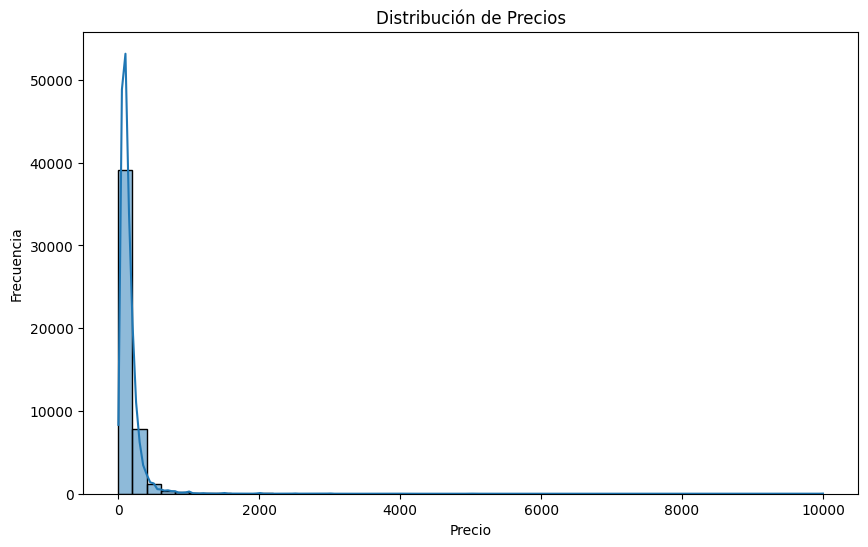

In [13]:
# Análisis de distribución de precios

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

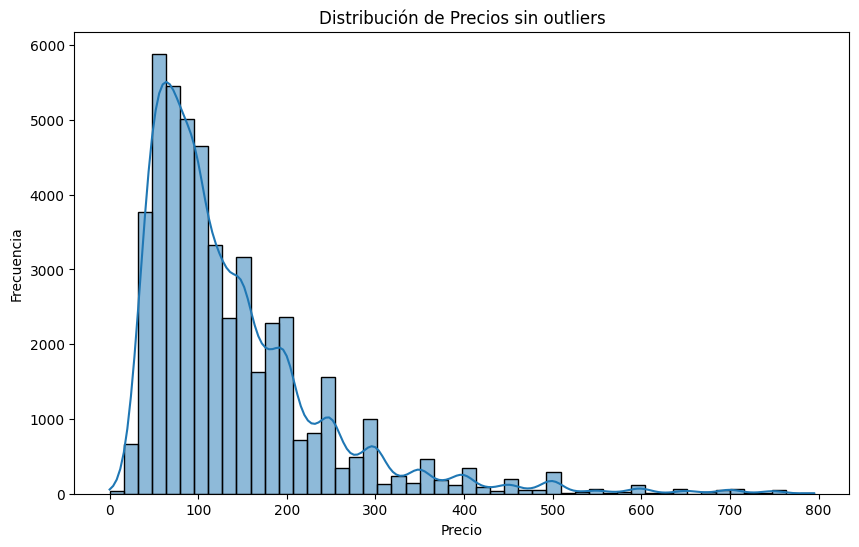

In [14]:
# Tengo que eliminar los valores atípicos en 'price'
# Hay precios muy altos que pueden ser outliers, por eso hay una asimetría positiva.
# Voy a quitar con precios hasta el percentil 99.

quartil_99 = df['price'].quantile(0.99)
df = df[df['price'] < quartil_99]

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribución de Precios sin outliers')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

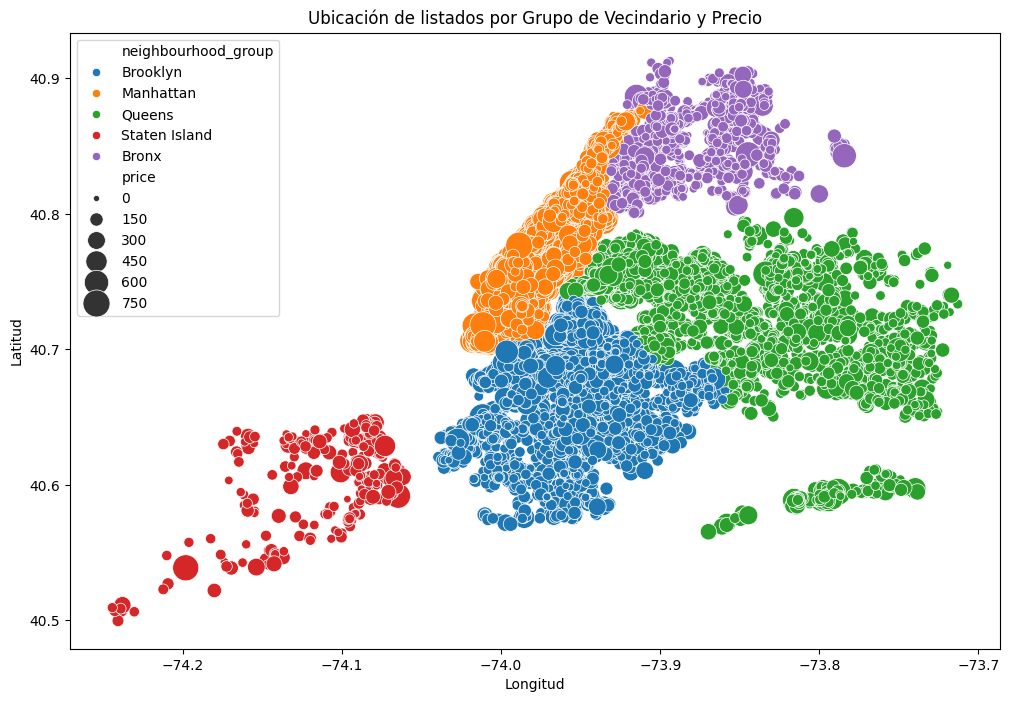

In [15]:
# Se eliminaron los precios que estaban por encima del percentil 99 para manejar los outliers
# Así tengo una mejor distribución para el análisis y modelado.

# Análisis de relaciones entre variables
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', size='price', sizes=(20, 400), data=df)
plt.title('Ubicación de listados por Grupo de Vecindario y Precio')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

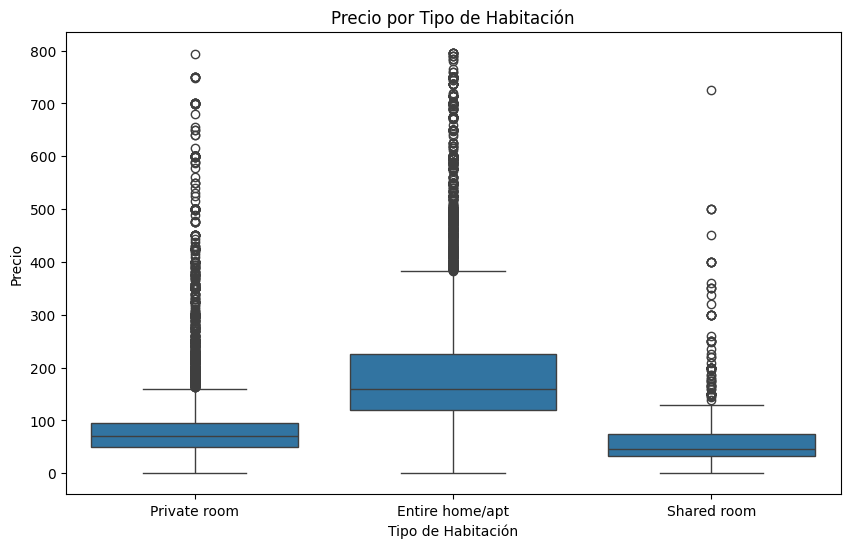

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Precio por Tipo de Habitación')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Precio')
plt.show()

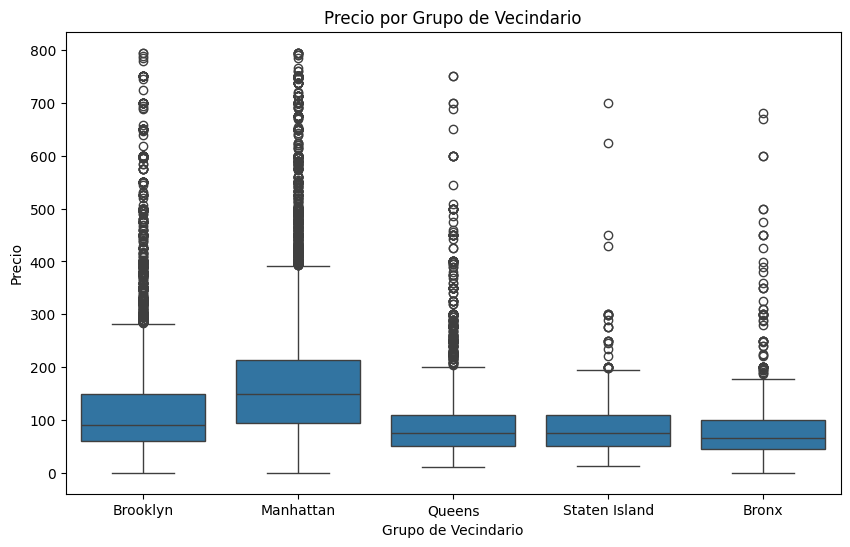

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.title('Precio por Grupo de Vecindario')
plt.xlabel('Grupo de Vecindario')
plt.ylabel('Precio')
plt.show()

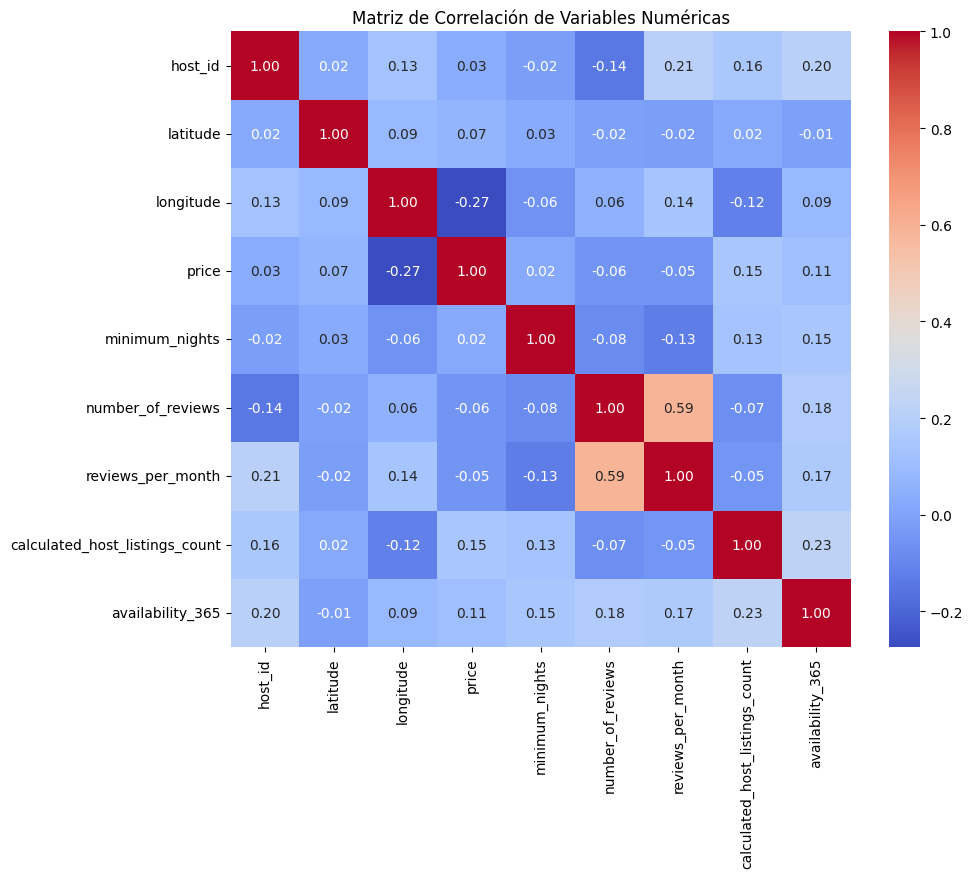

In [18]:
# Los gráficos de dispersión de latitud/longitud muestran la concentración geográfica de los listados
# Parece que Manhattan tiene precios más altos.
# Los boxplots confirman que 'Entire home/apt' es el tipo de habitación más caro
# Manhattan y Brooklyn tienen precios promedio más altos en comparación con otros neighbourhoods.

# Correlación entre variables numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

In [19]:
# 'minimum_nights' y 'calculated_host_listings_count' tienen baja correlación con 'price'.
# 'number_of_reviews' y 'reviews_per_month' tienen alta correlación.
# No hay una correlación muy fuerte entre las variables numéricas y el precio.

# División del conjunto de datos en train y test
X = df.drop('price', axis=1)
y = df['price']

In [20]:
X = pd.get_dummies(X, columns=['neighbourhood_group', 'room_type'], drop_first=True)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train.shape

(38709, 16)

In [23]:
X_test.shape

(9678, 16)

In [24]:
y_train.shape

(38709,)

In [25]:
y_test.shape

(9678,)

In [29]:
# El conjunto de datos se ha dividido correctamente en 80% entrenamiento y 20% prueba
# Hay datos separados para evaluar el rendimiento de el modelo.
# Se aplicó One-Hot Encoding a las variables categóricas en X.

# Por último guardaré el dataset en la carpeta de 'proccessed'

df.to_csv('../data/processed/AB_NYC_2019_processed.csv', index=False)